In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Librerías para operaciones de regresión lineal
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Sacamos los datos del archivo csv
data = pd.read_csv("./wbes_sintetico.csv")
cols = [
    "sales_annual_usd",
    "labor_productivity_usd_per_employee",
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "digital_payments",
]

completeData = data[cols]

dataNoNull = completeData.dropna()

dataNoNull.shape
dataNoNull.head()

,sales_annual_usd,labor_productivity_usd_per_employee,employees,firm_age_years,training,access_finance,exporter,competition_level,digital_payments
0,42879.327130,5374.714150,13.0,10.0,1.0,1.0,0,Media,1
1,54570.897174,4728.282631,9.0,6.0,0.0,0.0,0,Baja,1
2,56311.260030,3104.627628,15.0,10.0,0.0,0.0,1,Baja,1
3,93419.359675,3129.017055,25.0,12.0,1.0,0.0,1,Baja,1
4,24608.889361,2824.645056,9.0,9.0,0.0,0.0,0,Baja,0


In [43]:
#Seleccionar los datos para determinar el coeficiente de correlación
x_train = np.array(dataNoNull['sales_annual_usd']).reshape(-1,1)
y_train = np.array(dataNoNull['labor_productivity_usd_per_employee']).reshape(-1,1)

In [44]:
#Calcular la formula de regresión lineal
r = linear_model.LinearRegression()

#Entrenando el modelo con los datos
r.fit(x_train, y_train)

#Obtener las predicciones
y_pred = r.predict(x_train)

print('Coeficiente de correlación: ', r.coef_)
print('Interseccion: ', r.intercept_)
print('Error cuadrático de la media: ', mean_squared_error(y_train, y_pred))
print('Varianza: ', r2_score(y_train, y_pred))

Coeficiente de correlación:  [[0.0338968]]
Interseccion:  [1971.95126223]
Error cuadrático de la media:  3231175.1243719026
Varianza:  0.0958230382947215


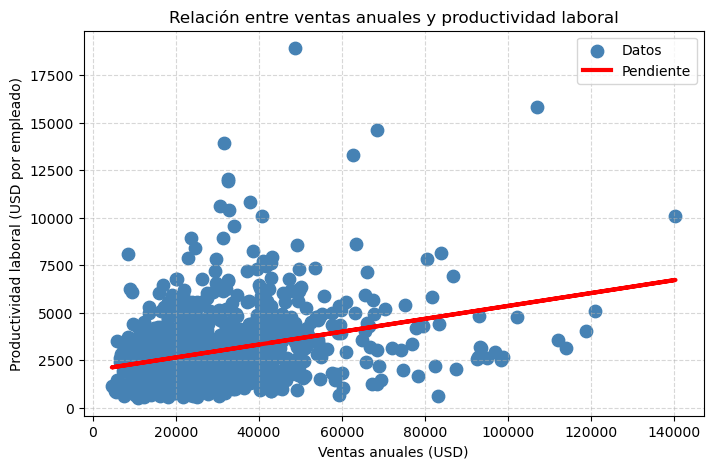

In [45]:
# Realizar la gráfica de dispersión y la pendiente
x = x_train.ravel()
y = y_train.ravel()

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='steelblue', s=80, label='Datos')
plt.plot(x, y_pred, color='red', linewidth=3, label='Pendiente')
plt.xlabel('Ventas anuales (USD)')
plt.ylabel('Productividad laboral (USD por empleado)')
plt.title('Relación entre ventas anuales y productividad laboral')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()